In [11]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [15]:
font_s = 15
font_w = "bold"
    
def plot_histogram(df, fig_size, score, reference, query, window):
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.ylim(0,2000)
    plt.xscale('symlog', base=2)
    bin_range = range(min(df[score]), max(df[score]))
    sns.histplot(data=df, x=score, kde=True, bins=bin_range)
    plt.xticks([-0.55,0,1,2,3,5,10,20,31,40,61,100,300,1000,2000], fontsize = 12)
    plt.yticks(fontsize = font_s)
    fig.axes[0].xaxis.set_major_formatter(ScalarFormatter())
    plt.title(f'reference: {reference}, query: {query}, window: {window}')
    plt.xlabel(score, fontsize = font_s)
    plt.ylabel('Count', fontsize = font_s, fontweight=font_w)
    sns.despine(offset=5)

def plot_histogram_by_chr(df, fig_size, score, reference, query, window):
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.ylim(0,2000)
    plt.xscale('symlog', base=2)
    bin_range = range(min(df[score]), max(df[score]))
    sns.histplot(data=df, x=score, kde=True, bins=bin_range,
                hue="seqname", element="step")
    plt.xticks([-0.55,0,1,2,3,5,10,20,30,50,120,350,1000,2000], fontsize = font_s)
    plt.yticks(fontsize = font_s)
    fig.axes[0].xaxis.set_major_formatter(ScalarFormatter())
    plt.title(f'reference: {reference}, query: {query}, window: {window}', fontsize = 9)
    plt.xlabel(score, fontsize = font_s, fontweight=font_w)
    plt.ylabel('Frequency', fontsize = font_s, fontweight=font_w)
    sns.despine(offset=5)

def plot_scatter_by_chr(df, fig_size, score, reference, query, window, chromosome):
    
    x_lim=int(max(df['end_scaled'])+1)
    fig_size = ((x_lim/40),1.5)
    
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.yscale('symlog', base=2)
    sns.scatterplot(data=df, x='end_scaled',y=score, s=10, alpha = 0.6, color='slategray')
    fig.axes[0].yaxis.set_major_formatter(ScalarFormatter())
    plt.title(f'{chromosome}, reference: {reference}, query: {query}, window: {window}', fontweight=font_w)
    plt.ylabel('Variations', fontsize = font_s, fontweight=font_w)
    plt.xlabel('Chromosome (Mbp)', fontsize = font_s, fontweight=font_w)
    plt.yticks([0,2,10, 30, 120, 350, 1000], fontsize = font_s)
#     xticks = np.arange(0, x_lim , step=10)
#     plt.xticks(xticks, fontsize = font_s)
    plt.xticks(list(range(0,800,100)))
    plt.ylim(0,1500)
    plt.xlim(0, x_lim)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    sns.despine(offset=5)
    

In [222]:
score = 'observed_kmers'
reference = 'symattis'
query = 'julius-pg'
window = '50000'
chromosome='chr1A'
# path=f'/Volumes/quirozj/00_kmers/monococcum/01_IBS_output/{reference}/'
# path=f'/Volumes/watseq/kmer_agis/jf_tauschii/01_IBS_output/{reference}/'
path=f'/Volumes/quirozj/09_watseq/01_IBSpy_output/{reference}/'
path

'/Volumes/quirozj/09_watseq/01_IBSpy_output/symattis/'

In [223]:
in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
# '/Volumes/quirozj/09_watseq/01_IBSpy_output'
in_file

,seqname,start,end,total_kmers,observed_kmers,variations,kmer_distance
0,chr1A,0,50000,49846,41249,392,7125
1,chr1A,49969,99969,49793,36239,605,8937
2,chr1A,99938,149938,49556,38280,518,7504
3,chr1A,149907,199907,49797,41058,482,7844
4,chr1A,199876,249876,49483,41447,468,7103
...,...,...,...,...,...,...,...
299299,chrUn,956606536,956656536,27834,27353,43,797
299300,chrUn,956656505,956706505,27783,27430,44,937
299301,chrUn,956706474,956756474,27702,27273,34,822
299302,chrUn,956756443,956806443,27733,27062,41,803


## Observed k-mers

In [224]:
in_file['observed_kmers'] = in_file['observed_kmers']/in_file['total_kmers']*100
in_file

,seqname,start,end,total_kmers,observed_kmers,variations,kmer_distance
0,chr1A,0,50000,49846,82.752879,392,7125
1,chr1A,49969,99969,49793,72.779306,605,8937
2,chr1A,99938,149938,49556,77.245944,518,7504
3,chr1A,149907,199907,49797,82.450750,482,7844
4,chr1A,199876,249876,49483,83.760079,468,7103
...,...,...,...,...,...,...,...
299299,chrUn,956606536,956656536,27834,98.271898,43,797
299300,chrUn,956656505,956706505,27783,98.729439,44,937
299301,chrUn,956706474,956756474,27702,98.451375,34,822
299302,chrUn,956756443,956806443,27733,97.580500,41,803


In [225]:
def plot_scatter_by_chr(df, fig_size, score, reference, query, window, chromosome):
    x_lim=int(max(df['end_scaled'])+1)
    fig_size = ((x_lim/40),3)
    
    font_s = 15
    fig=plt.figure(figsize=fig_size, facecolor='w')
#     plt.yscale('symlog', base=2)
    sns.scatterplot(data=df, x='end_scaled',y=score, s=15, alpha = 0.6, color='slategray')
    fig.axes[0].yaxis.set_major_formatter(ScalarFormatter())
    plt.title(f'{chromosome}, reference: {reference}, query: {query}, window: {window}', fontweight=font_w)
    plt.ylabel('Observed k-mers (%)', fontsize = font_s, fontweight=font_w)
    plt.xlabel(f'{chromosome} (Mbp)', fontsize = font_s, fontweight=font_w)
    plt.yticks(list(np.arange(98,100.22,0.22)), fontsize = 30)
#     xticks = np.arange(0, x_lim , step=10)
#     plt.xticks(xticks, fontsize = font_s)
    plt.xticks(list(range(0,800,100)), fontsize = 30)
    plt.ylim(98, 100.2)
    plt.xlim(0, x_lim)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    sns.despine(offset=5)

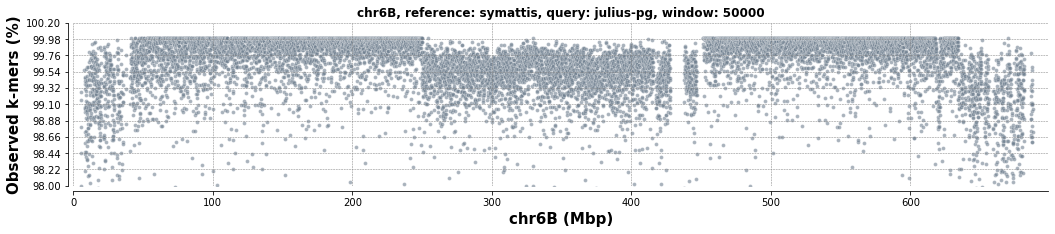

In [226]:
fig_size=(25, 5)

by_chr_df = in_file[in_file['seqname'].str.contains('chr6B')]
chromosomes = by_chr_df['seqname'].unique().tolist()

# chromosomes=['chr']
for chromosome in chromosomes:
#     in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
    individual_chr = in_file[in_file['seqname'].str.contains(chromosome)].copy()
    individual_chr['end_scaled'] = (individual_chr['end']/1000000).round(1)
    plot_scatter_by_chr(individual_chr, fig_size, score, reference, query, window, chromosome)

## Variations

In [217]:
score = 'variations'
reference = 'symattis'
query = 'julius-pg'
window = '50000'
path=f'/Volumes/quirozj/09_watseq/01_IBSpy_output/{reference}/'
in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
in_file

,seqname,start,end,total_kmers,observed_kmers,variations,kmer_distance
0,chr1A,0,50000,49846,41249,392,7125
1,chr1A,49969,99969,49793,36239,605,8937
2,chr1A,99938,149938,49556,38280,518,7504
3,chr1A,149907,199907,49797,41058,482,7844
4,chr1A,199876,249876,49483,41447,468,7103
...,...,...,...,...,...,...,...
299299,chrUn,956606536,956656536,27834,27353,43,797
299300,chrUn,956656505,956706505,27783,27430,44,937
299301,chrUn,956706474,956756474,27702,27273,34,822
299302,chrUn,956756443,956806443,27733,27062,41,803


In [220]:
def plot_scatter_by_chr(df, fig_size, score, reference, query, window, chromosome):
    x_lim=int(max(df['end_scaled'])+1)
    fig_size = ((x_lim/40),3)
    
    font_s = 15
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.yscale('symlog', base=2)
    sns.scatterplot(data=df, x='end_scaled',y=score, s=15, alpha = 0.6, color='slategray')
    fig.axes[0].yaxis.set_major_formatter(ScalarFormatter())
    plt.title(f'{chromosome}, reference: {reference}, query: {query}, window: {window}', fontweight=font_w)
    plt.ylabel('Variations count', fontsize = font_s, fontweight=font_w)
    plt.xlabel(f'{chromosome} (Mbp)', fontsize = font_s, fontweight=font_w)
    plt.yticks([0,1,2,5,10, 30, 120, 350, 1000], fontsize = font_s)
#     xticks = np.arange(0, x_lim , step=10)
#     plt.xticks(xticks, fontsize = font_s)
    plt.xticks(list(range(0,1000,100)), fontsize = 30)
    plt.ylim(0,1500)
    plt.xlim(0, x_lim)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    sns.despine(offset=5)

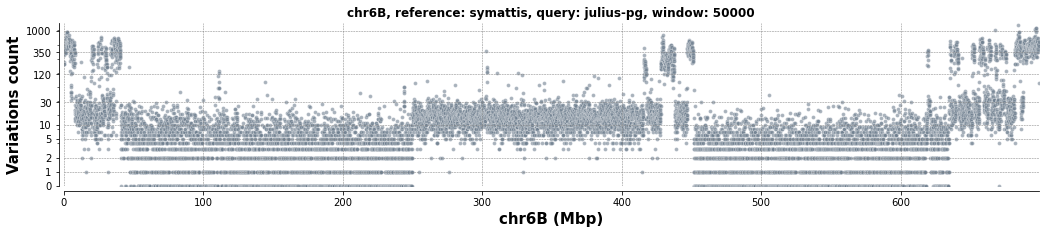

In [221]:
fig_size=(25, 5)

by_chr_df = in_file[in_file['seqname'].str.contains('chr6B')]
chromosomes = by_chr_df['seqname'].unique().tolist()

# chromosomes=['chr']
for chromosome in chromosomes:
#     in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
    individual_chr = in_file[in_file['seqname'].str.contains(chromosome)].copy()
    individual_chr['end_scaled'] = (individual_chr['end']/1000000).round(1)
    plot_scatter_by_chr(individual_chr, fig_size, score, reference, query, window, chromosome)

## k-mer distance

In [230]:
score = 'kmer_distance'
reference = 'symattis'
query = 'julius-pg'
window = '50000'
path=f'/Volumes/quirozj/09_watseq/01_IBSpy_output/{reference}/'
in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
in_file

,seqname,start,end,total_kmers,observed_kmers,variations,kmer_distance
0,chr1A,0,50000,49846,41249,392,7125
1,chr1A,49969,99969,49793,36239,605,8937
2,chr1A,99938,149938,49556,38280,518,7504
3,chr1A,149907,199907,49797,41058,482,7844
4,chr1A,199876,249876,49483,41447,468,7103
...,...,...,...,...,...,...,...
299299,chrUn,956606536,956656536,27834,27353,43,797
299300,chrUn,956656505,956706505,27783,27430,44,937
299301,chrUn,956706474,956756474,27702,27273,34,822
299302,chrUn,956756443,956806443,27733,27062,41,803


In [228]:
def plot_scatter_by_chr(df, fig_size, score, reference, query, window, chromosome):
    x_lim=int(max(df['end_scaled'])+1)
    fig_size = ((x_lim/40),3)
    
    font_s = 15
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.yscale('symlog', base=2)
    sns.scatterplot(data=df, x='end_scaled',y=score, s=15, alpha = 0.6, color='slategray')
    fig.axes[0].yaxis.set_major_formatter(ScalarFormatter())
    plt.title(f'{chromosome}, reference: {reference}, query: {query}, window: {window}', fontweight=font_w)
    plt.ylabel('k-mer distance', fontsize = font_s, fontweight=font_w)
    plt.xlabel(f'{chromosome} (Mbp)', fontsize = font_s, fontweight=font_w)
    plt.yticks([0,1,2,5,30,120,300,1000,2000,5000,10000, 25000, 50000], fontsize = font_s)
#     xticks = np.arange(0, x_lim , step=10)
#     plt.xticks(xticks, fontsize = font_s)
    plt.xticks(list(range(0,1000,100)), fontsize = 30)
    plt.ylim(0,50000)
    plt.xlim(0, x_lim)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    sns.despine(offset=5)

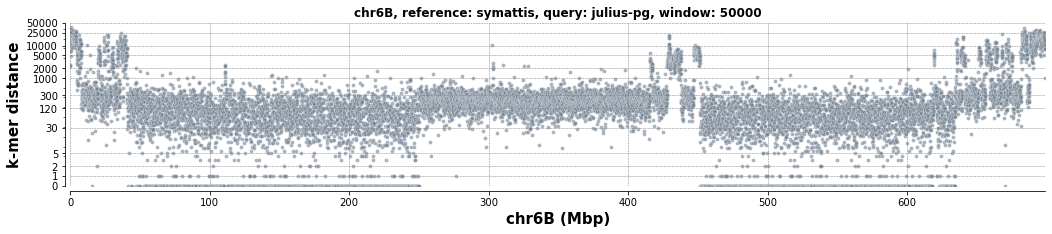

In [231]:
fig_size=(25, 5)

by_chr_df = in_file[in_file['seqname'].str.contains('chr6B')]
chromosomes = by_chr_df['seqname'].unique().tolist()

# chromosomes=['chr']
for chromosome in chromosomes:
#     in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
    individual_chr = in_file[in_file['seqname'].str.contains(chromosome)].copy()
    individual_chr['end_scaled'] = (individual_chr['end']/1000000).round(1)
    plot_scatter_by_chr(individual_chr, fig_size, score, reference, query, window, chromosome)

In [238]:
# fig_size=(25, 4)
# plot_histogram(in_file, fig_size, score, reference, query, window)

In [237]:
# by_chr_df = in_file[in_file['seqname'].str.contains('D')]
# plot_histogram(by_chr_df, fig_size, score, reference, query, window)

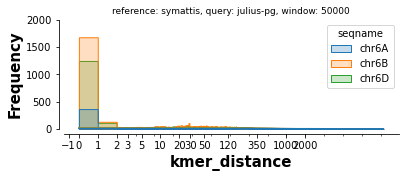

In [239]:
fig_size=(6, 2)
score = 'kmer_distance'
by_chr_df = in_file[in_file['seqname'].str.contains('6')]
plot_histogram_by_chr(by_chr_df, fig_size, score, reference, query, window)